In [31]:
import pandas as pd

In [32]:
df = pd.read_csv('./bank-dataset/bank-full.csv')

In [33]:
df.head()

,age,job,martial,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   martial    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [35]:
for col in df.columns.to_list():
    if df[col].dtype == 'object':
        print("*****", col, "*****")
        print(df[col].value_counts())
        print()

***** job *****
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

***** martial *****
married     27214
single      12790
divorced     5207
Name: martial, dtype: int64

***** education *****
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

***** default *****
no     44396
yes      815
Name: default, dtype: int64

***** housing *****
yes    25130
no     20081
Name: housing, dtype: int64

***** loan *****
no     37967
yes     7244
Name: loan, dtype: int64

***** contact *****
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

***** month *****
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep

In [36]:
job_replace_dict = {
    'blue-collar': 1,
    'management': 2,
    'technician': 3,
    'admin.': 4,
    'services': 5,
    'retired': 6,
    'self-employed': 7,
    'entrepreneur': 8,
    'unemployed': 9,
    'housemaid': 10,
    'student': 11,
    'unknown': 12
}

martial_replace_dict = {
    'married': 1,
    'divorced': 2,
    'single': 3
}

education_replace_dict = {
    'unknown': 0,
    'secondary': 2,
    'primary': 1,
    'tertiary': 3
}

binary_replace_dict = {'no': 0, 'yes': 1}

contact_replace_dict = {
    'unknown': 0,
    'telephone': 1,
    'cellular': 2
}

month_replace_dict = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

poutcome_replace_dict = {
    'success': 1,
    'failure': -1,
    'unknown': 0,
    'other': 0
}


In [37]:
df['y'] = df['y'].replace(binary_replace_dict)
df['poutcome'] = df['poutcome'].replace(poutcome_replace_dict)
df['month'] = df['month'].replace(month_replace_dict)
df['default'] = df['default'].replace(binary_replace_dict)
df['contact'] = df['contact'].replace(contact_replace_dict)
df['housing'] = df['housing'].replace(binary_replace_dict)
df['loan'] = df['loan'].replace(binary_replace_dict)
df['education'] = df['education'].replace(education_replace_dict)
df['martial'] = df['martial'].replace(martial_replace_dict)
df['job'] = df['job'].replace(job_replace_dict)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   martial    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


In [39]:
from sklearn.model_selection import train_test_split
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
X.shape

(45211, 16)

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

grid_param_dict = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

dtree = DecisionTreeClassifier(class_weight='balanced')

dtree_cv = GridSearchCV(dtree, grid_param_dict, cv=5, n_jobs=-1)
dtree_cv.fit(X_train.values, y_train.values)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5]})

In [42]:
dtree_cv.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2}

In [43]:
best_model = dtree_cv.best_estimator_

In [62]:
X_train.columns

Index(['age', 'job', 'martial', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

<Axes: >

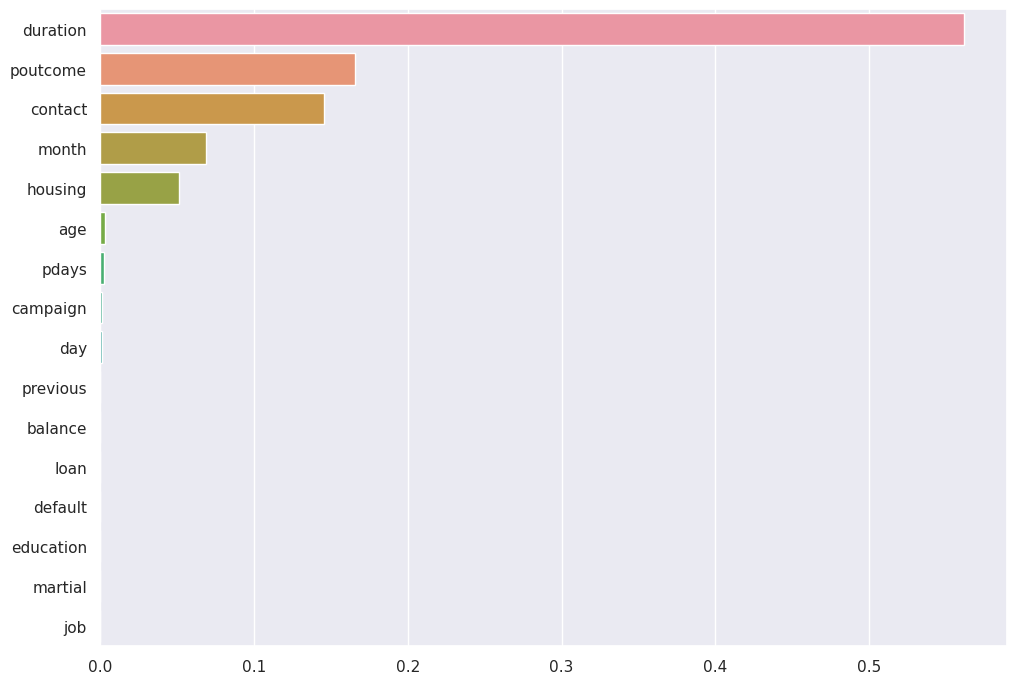

In [68]:
import seaborn as sns

feature_importances = best_model.feature_importances_
# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = X_train.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a bar plot of the feature importances
sns.barplot(x=sorted_importances, y=sorted_feature_names)

In [44]:
best_model.score(X_train, y_train)

/home/sumit/miniconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.7985275065567037

In [45]:
best_model.score(X_test, y_test)

/home/sumit/miniconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.7919492774992628

In [46]:
import pickle

pickle.dump(best_model, open('dtree_model.pkl', 'wb'))

In [71]:
input_data = {
    "age": 60, #age
    "job": job_replace_dict['student'], # job
    "martial": martial_replace_dict['single'], # martial
    "education": education_replace_dict['tertiary'], # education
    "default": binary_replace_dict['no'], # default
    "balance": 50000, # balance
    "housing": binary_replace_dict['no'], # housing
    "loan": binary_replace_dict['yes'], # loan
    "contact": contact_replace_dict['cellular'],
    "day": 15,
    "month": month_replace_dict['jun'],
    "duration": 300,
    "campaign": 23,
    "pdays": -1,
    "previous": 0,
    "poutcome": poutcome_replace_dict['failure']
}

In [72]:
best_model.predict([list(input_data.values())])

array([1])